In [12]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [13]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data,
                                                   olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

<ipython-input-12-e9dea4eeedb6>:9: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
<ipython-input-12-e9dea4eeedb6>:9: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from current font.
  plt.tight_layout()
<ipython-input-12-e9dea4eeedb6>:9: UserWarning: Glyph 49492 (\N{HANGUL SYLLABLE SYEO}) missing from current font.
  plt.tight_layout()
<ipython-input-12-e9dea4eeedb6>:9: UserWarning: Glyph 50648 (\N{HANGUL SYLLABLE EL}) missing from current font.
  plt.tight_layout()
<ipython-input-12-e9dea4eeedb6>:9: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  plt.tight_layout()
<ipython-input-12-e9dea4eeedb6>:10: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.savefig(path, format=fig_extension, dpi=resolution)
<ipython-input-12-e9dea4eeedb6>:10: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from current font.
  plt.savefig(path, format=fig_extension, dpi=res

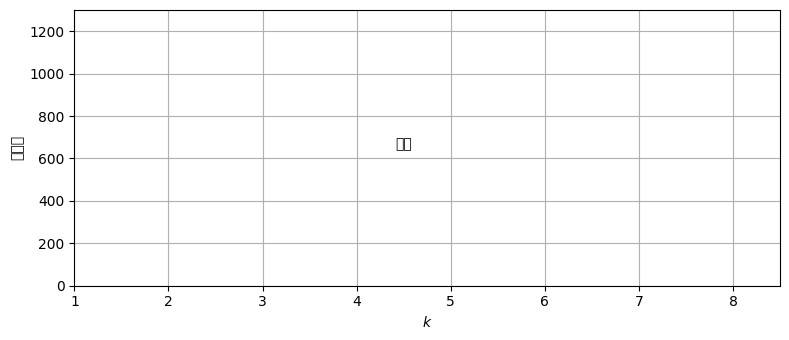

In [32]:
# 추가 코드 - 이 셀은 그림 9-8을 생성하고 저장합니다.

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_train)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("이너셔")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "엘보", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
save_fig("inertia_vs_k_plot")
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

<ipython-input-12-e9dea4eeedb6>:9: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  plt.tight_layout()
<ipython-input-12-e9dea4eeedb6>:9: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from current font.
  plt.tight_layout()
<ipython-input-12-e9dea4eeedb6>:9: UserWarning: Glyph 50659 (\N{HANGUL SYLLABLE ES}) missing from current font.
  plt.tight_layout()
<ipython-input-12-e9dea4eeedb6>:9: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  plt.tight_layout()
<ipython-input-12-e9dea4eeedb6>:9: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
<ipython-input-12-e9dea4eeedb6>:10: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  plt.savefig(path, format=fig_extension, dpi=resolution)
<ipython-input-12-e9dea4eeedb6>:10: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from current font.
  plt.savefig(path, format=fig_extension, dpi=r

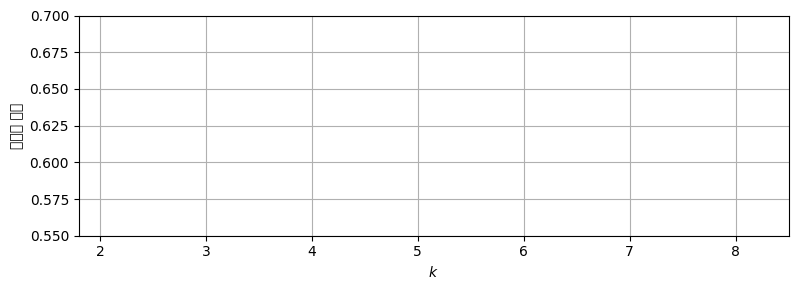

In [33]:
# 추가 코드 - 이 셀은 그림 9-9를 생성하고 저장합니다.

silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("실루엣 점수")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
save_fig("silhouette_score_vs_k_plot")
plt.show()

In [37]:
print(kmeans_per_k)
print(silhouette_scores)

[KMeans(n_clusters=1, n_init=10, random_state=42), KMeans(n_clusters=2, n_init=10, random_state=42), KMeans(n_clusters=3, n_init=10, random_state=42), KMeans(n_clusters=4, n_init=10, random_state=42), KMeans(n_clusters=5, n_init=10, random_state=42), KMeans(n_clusters=6, n_init=10, random_state=42), KMeans(n_clusters=7, n_init=10, random_state=42), KMeans(n_init=10, random_state=42), KMeans(n_clusters=9, n_init=10, random_state=42)]
[0.15179649, 0.12265265, 0.113990605, 0.108580135, 0.09737217, 0.10249914, 0.08812606, 0.10600769]


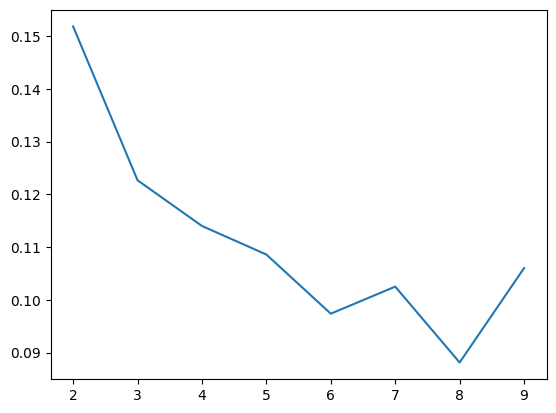

In [36]:
plt.plot(range(2, 10), silhouette_scores)
plt.show()

In [38]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X_train)

In [39]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train, kmeans.labels_)

0.15179649

In [3]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199